In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 200)
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import string
import nltk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from bs4 import BeautifulSoup

sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

## Previewing the Data

In [2]:
df = pd.read_csv('brand_tweets_dataset.csv', encoding='latin1')
df.head(20)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear,Apple,Positive emotion


In [3]:
df.rename(columns={'tweet_text':'tweet', 'emotion_in_tweet_is_directed_at':'brand_product', 
                  'is_there_an_emotion_directed_at_a_brand_or_product':'sentiment'}, inplace=True)

In [4]:
df.head(20)

,tweet,brand_product,sentiment
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear,Apple,Positive emotion


In [5]:
#how many tweets are included in this dataset
len(df)

9093

In [6]:
#check for null values in columns
df.isna().sum()

tweet               1
brand_product    5802
sentiment           0
dtype: int64

In [7]:
df.brand_product.value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: brand_product, dtype: int64

We will choose to drop the row corresponding to the null value in the `tweet` column. There are 5802 null values for the `brand_product` column. We will need to identify keywords that identify a brand so that we can attempt to fill in the corresponding brand.

In [8]:
df.dropna(subset=['tweet'], inplace=True)
df.fillna('no_brand', inplace=True)

In [9]:
df.brand_product.value_counts()

no_brand                           5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: brand_product, dtype: int64

In [10]:
df.sentiment.value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: sentiment, dtype: int64

## Cleaning Data

In [11]:
df.head(20)

,tweet,brand_product,sentiment
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd,no_brand,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw so I can show them my Sprint Galaxy S still running Android 2.1. #fail,Android,Positive emotion


In [12]:
df.tail(20)

,tweet,brand_product,sentiment
9073,At #SXSW your iphone charger is your best friend.,no_brand,No emotion toward brand or product
9074,At &quot;Your Mom Has an iPad: Designing for Boomers&quot; #sxsw @mention Austin Convention Center {link},no_brand,No emotion toward brand or product
9075,At &quot;Your Mom Has an iPad&quot; session #yourmom #sxsw,no_brand,No emotion toward brand or product
9076,At &quot;Your Mom Has an iPad&quot; session at #SXSW (@mention ACC - Ballroom B w/ 23 others) {link},no_brand,No emotion toward brand or product
9077,@mention your PR guy just convinced me to switch back to iPhone. Great #sxsw coverage. #princess,iPhone,Positive emotion
9078,Cue the hype RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles,no_brand,No emotion toward brand or product
9079,&quot;papyrus...sort of like the ipad&quot; - nice! Lol! #SXSW Lavelle,iPad,Positive emotion
9080,"Diller says Google TV &quot;might be run over by the PlayStation and the Xbox, which are essentially ready today.&quot; #sxsw #diller",Other Google product or service,Negative emotion
9081,Google says reports about launch of Circles social network at #sxsw are incorrect {link} No launch today at any rate.,no_brand,No emotion toward brand or product
9082,#Apple guys screaming and running by line to open the shop #austin #sxsw #ipad2 #crazyco {link},no_brand,No emotion toward brand or product


In [13]:
#drop the last row since it appears that tweet won't make much sense regardless of brand affiliation
df.drop(9092, inplace=True)
df.reset_index(drop=True, inplace=True)

In [14]:
ipad_app_keywords = ['iPad app', 'ipad app', 'IPad app', 'IPAD app', 'Ipad app']
iphone_app_keywords = ['iPhone app', 'iphone app', 'IPhone app', 'Iphone app', 'IPHONE app']
android_app_keywords = ['android app', 'Android app', 'ANDROID app']

#reclassify unbranded tweets as tweets related to iOS apps
for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in ipad_app_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'iPad or iPhone App'
            else:
                continue
    else:
        continue
        

#reclassify unbranded tweets as tweets related to iOS apps
for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in iphone_app_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'iPad or iPhone App'
            else:
                continue
    else:
        continue
        
#reclassify unbranded tweets as tweets related to Android apps
for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in android_app_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'Android App'
            else:
                continue
    else:
        continue


In [15]:
ipad_keywords = ['iPad', 'ipad', 'IPad', 'IPAD', 'Ipad' '#ipad', '#iPad', '#IPad', '#IPAD', '#Ipad']

iphone_keywords = ['iPhone', 'iphone', 'IPhone', 'IPHONE', 'Iphone', '#iphone', '#iPhone', '#IPhone'
                  '#Iphone', '#IPHONE']

android_keywords = ['android', 'Android', 'ANDROID', '#android', '#Android', '#ANDROID']

#reclassify unbranded tweets as tweets related to iPad devices
for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in ipad_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'iPad'
            else:
                continue
    else:
        continue

#reclassify unbranded tweets as tweets related to iPhone devices
for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in iphone_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'iPhone'
            else:
                continue
    else:
        continue

#reclassify unbranded tweets as tweets related to Android devices
for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in android_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'Android'
            else:
                continue
    else:
        continue

In [16]:
#reclassify all other unbranded tweets as either Google or Apple

apple_keywords = ['iPhone', 'iPad', 'iTunes', 'iphone', 'ipad', 'itunes', 'apple', '#iPhone', '#iphone', 
                 '#iPad', '#ipad', '#Apple', '#apple', 'Apple', 'IPAD', 'IPHONE', 'ITUNES', 'IPad', 'IPhone']
google_keywords = ['Google', 'google', 'Android', 'android', '#google', '#Google', '#Android', '#android', 
                  'GOOGLE', 'ANDROID']

for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in apple_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'Apple'
            else:
                continue
    else:
        continue
        
for i in range(0, len(df)):
    if df.loc[i, 'brand_product'] == 'no_brand':
        tweet_phrase = df.loc[i, 'tweet']
        for word in google_keywords:
            if word in tweet_phrase:
                df.loc[i, 'brand_product'] = 'Google'
            else:
                continue
    else:
        continue

In [17]:
df.brand_product.value_counts()

iPad                               2450
Google                             2126
Apple                              1424
iPhone                             1043
no_brand                            721
iPad or iPhone App                  606
Android                             296
Other Google product or service     293
Android App                          97
Other Apple product or service       35
Name: brand_product, dtype: int64

In [18]:
df.sentiment.value_counts()


No emotion toward brand or product    5387
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: sentiment, dtype: int64

In [19]:
df.loc[df['brand_product'] == 'no_brand']['sentiment'].value_counts()


No emotion toward brand or product    704
Positive emotion                       10
I can't tell                            6
Negative emotion                        1
Name: sentiment, dtype: int64

In [20]:
pd.set_option('display.max_rows', None)
df.loc[df['sentiment'] == "I can't tell"]

,tweet,brand_product,sentiment
89,Thanks to @mention for publishing the news of @mention new medical Apps at the #sxswi conf. blog {link} #sxsw #sxswh,no_brand,I can't tell
101,ÛÏ@mention &quot;Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow,iPad,I can't tell
236,"Just what America needs. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",Google,I can't tell
340,The queue at the Apple Store in Austin is FOUR blocks long. Crazy stuff! #sxsw,Apple,I can't tell
367,Hope it's better than wave RT @mention Buzz is: Google's previewing a social networking platform at #SXSW: {link},Google,I can't tell
412,SYD #SXSW crew your iPhone extra juice pods have been procured.,iPhone,I can't tell
440,Why Barry Diller thinks iPad only content is nuts @mention #SXSW {link},iPad,I can't tell
487,Gave into extreme temptation at #SXSW and bought an iPad 2... #impulse,iPad,I can't tell
639,Catch 22Û_ I mean iPad 2 at #SXSW : {link},iPad,I can't tell
704,Forgot my iPhone for #sxsw. Android only. Knife to a gun fight,iPhone,I can't tell


In [21]:
#sort "I can't tell tweets as positive, negative or neutral"
#only sort tweets that have a brand
positive_index = [340, 487, 704, 744, 1163, 1296, 2094, 2333, 2471, 2613, 2731, 2901, 3144, 3220, 3466,
                 3854, 4095, 4296, 7270, 7569, 881]

negative_index = [101, 236, 639, 1390, 1669, 1780, 1907, 1960, 2115, 2546, 2616, 2973, 3057, 3297, 3351, 
                 3538, 4001, 4537, 4559, 4881, 4898, 4914, 4941, 5323, 5395, 5395, 5663, 5925, 5960, 6648, 6669,
                 7201, 7838, 8063, 8321, 8460, 8508, 8610, 8830, 9019, 9031, 9057, 9065]

neutral_index = [367, 412, 440, 748, 1068, 1086, 1421, 1436, 1557, 1598, 1715, 1935, 2143, 2166, 2262, 2447, 
                2524, 2596, 2738, 2773, 2953, 3190, 3196, 3264, 3350, 3500, 3893, 3938, 3940, 4085, 4137, 4289,
                4309, 4374, 4617, 4861, 5151, 5661, 5826, 6465, 6946, 7236, 7266, 8204, 8469, 8495, 8513, 8845
                ]

#different language
#[748, 881, 1544, 2067, 2317, 5761, 8630]

#actually can't tell
#[4560, 4744, 5221, 5257, 5367, 6397, 6731, 6914, 7035, 7042, 7175, 7211, 7338, 7382, 7468, 7480
# 7494, 7732, 7810, 7888, 8014, 8130, 8524, 8701, 8712, 9036]



In [22]:
#english translation of two spanish tweets
#not sure of languages for other tweets so they will be dropped

df.loc[748, 'tweet'] = 'Google will not be launching any products at South by SouthWest #sxsw 2011 {link}'
df.loc[881, 'tweet'] = 'I am buying my iPad in the #SXSW (@mention Apple Store, SXSW w/ 62 others) {link}'


#reassign unknown tweets as positive, negative, or neutral sentiment
for i in positive_index:
    df.loc[i, 'sentiment'] = 'Positive emotion'
    
for j in negative_index:
    df.loc[j, 'sentiment'] = 'Negative emotion'
    
for k in neutral_index:
    df.loc[k, 'sentiment'] = 'No emotion toward brand or product'

In [23]:
df.sentiment.value_counts()

No emotion toward brand or product    5435
Positive emotion                      2999
Negative emotion                       612
I can't tell                            45
Name: sentiment, dtype: int64

In [24]:
df.loc[df['brand_product'] == "no_brand"]


,tweet,brand_product,sentiment
50,"ÛÏ@mention {link} &lt;-- HELP ME FORWARD THIS DOC to all Anonymous accounts, techies,&amp; ppl who can help us JAM #libya #SXSW",no_brand,No emotion toward brand or product
51,÷¼ WHAT? ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter,no_brand,No emotion toward brand or product
52,".@mention @mention on the location-based 'fast, fun and future' - {link} (via @mention #sxsw",no_brand,No emotion toward brand or product
64,Agree. RT @mention Wait. FIONA APPLE is in town??? Somebody kidnap her and put her in a recording studio until she records a new album. #sxsw,no_brand,No emotion toward brand or product
65,At #sxsw? @mention / @mention wanna buy you a drink. 7pm at Fado on 4th. {link} Join us!,no_brand,No emotion toward brand or product
70,Chilcott: @mention #SXSW stand talking with Blogger staff. Too late to win competition for best tweet mentioning @mention So no t-shirt.,no_brand,No emotion toward brand or product
72,Gowalla's @mention promises to launch Foursquare check-in + Groupon rewards-type service at #SXSW. Finger's crossed. {link},no_brand,No emotion toward brand or product
76,I worship @mention {link} #SXSW,no_brand,No emotion toward brand or product
78,"Launching @mention #SxSW? RT @mention @mention Denies Social Network Called Circles Will Debut Today, Despite Report {link}",no_brand,No emotion toward brand or product
84,Stay tune @mention showcase #H4ckers {link} #SXSW,no_brand,No emotion toward brand or product


In [25]:
df.loc[101, 'tweet']

'\x89ÛÏ@mention &quot;Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow'

In [26]:
string_ = df.loc[101, 'tweet']
encoded_string = string_.encode('ascii', "ignore")
decode_string = encoded_string.decode()
clean_string = BeautifulSoup(decode_string, 'lxml').text
print(clean_string)

@mention "Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow


In [27]:
df_branded = df.loc[(df.brand_product != "no_brand") & (df.sentiment != "I can't tell")]
df_branded.reset_index(drop=True, inplace=True)

In [28]:
df_branded.brand_product.value_counts()


iPad                               2438
Google                             2113
Apple                              1416
iPhone                             1038
iPad or iPhone App                  605
Android                             296
Other Google product or service     292
Android App                          97
Other Apple product or service       35
Name: brand_product, dtype: int64

In [29]:
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
#nltk.download('wordnet')

In [30]:
###two functions one to clean up tweets for EDA, the other to clean tweets/create tokens for modeling

In [31]:
def clean_tweets(text):
    """This function takes in a string (in this case a tweet) and cleans the string such that any and all
    non-ASCII charcaters and HTML characters references are removed.
    
    The string will still have all forms of punctuation.
    
    """
    text = re.sub(' +', ' ', text) #reduce instances of multiple blank spaces to a single space
    encoded_text = text.encode('ascii', 'ignore') #encode string using 'ascii' encoding
    decode_text = encoded_text.decode() #decode string (convert from bytes to string object)
    clean_text = BeautifulSoup(decode_text, 'lxml').text #remove all html encodings such as &amp;, &quot;, etc.
    
    return clean_text
    

In [32]:
def clean_tweets_modeling(text):
    """Performs a similar operation as the clean_tweets function except this function will create a list of 
    tokens that can be used for NLP modeling.
    
    For example, a tweet will be transformed such that all non-ASCII characters and HTML encodings are removed.
    Then the function will remove all punctuation from the tweet, split each word in the tweet by white space,
    and finally lemmatize each word in the tweet and group the lemmatized tokens in a list."""
    
    text = re.sub(' +', ' ', text) #reduce instances of multiple spaces to a single space
    encoded_text = text.encode('ascii', 'ignore') #encode text as ascii characters only
    decode_text = encoded_text.decode() #convert bytes back to a string
    clean_text = BeautifulSoup(decode_text, 'lxml').text #remove html tages using BeautifulSoup
    
    no_punc_text = "".join([word for word in clean_text if word not in string.punctuation]) #remove punctuation
    tokens = re.split('\W+', no_punc_text) #split words by in no_punc_text variable by whitespace
    
    #Lemmatize each token and store tokens in a list
    final_tokens = [wnl.lemmatize(word) for word in tokens if word not in stopwords]
    
    return final_tokens    

In [33]:
df_branded['tweet'] = df_branded['tweet'].apply(lambda x: clean_tweets(x))
df_branded['tweet_tokens'] = df_branded['tweet'].apply(lambda x: clean_tweets_modeling(x.lower()))

/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
df_branded.head()

,tweet,brand_product,sentiment,tweet_tokens
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion,"[wesley83, 3g, iphone, 3, hr, tweeting, riseaustin, dead, need, upgrade, plugin, station, sxsw]"
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion,"[jessedee, know, fludapp, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, giving, free, t, sxsw]"
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion,"[swonderlin, wait, ipad, 2, also, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion,"[sxsw, hope, year, festival, isnt, crashy, year, iphone, app, sxsw]"
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)",Google,Positive emotion,"[sxtxstate, great, stuff, fri, sxsw, marissa, mayer, google, tim, oreilly, tech, booksconferences, matt, mullenweg, wordpress]"


In [35]:
#reassign sentiment values to integers
df_branded['sentiment'].replace({'Positive emotion': 1, 'Negative emotion': 0, 
                                 'No emotion toward brand or product': 2}, inplace=True)

/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Exploratory Data Analysis 

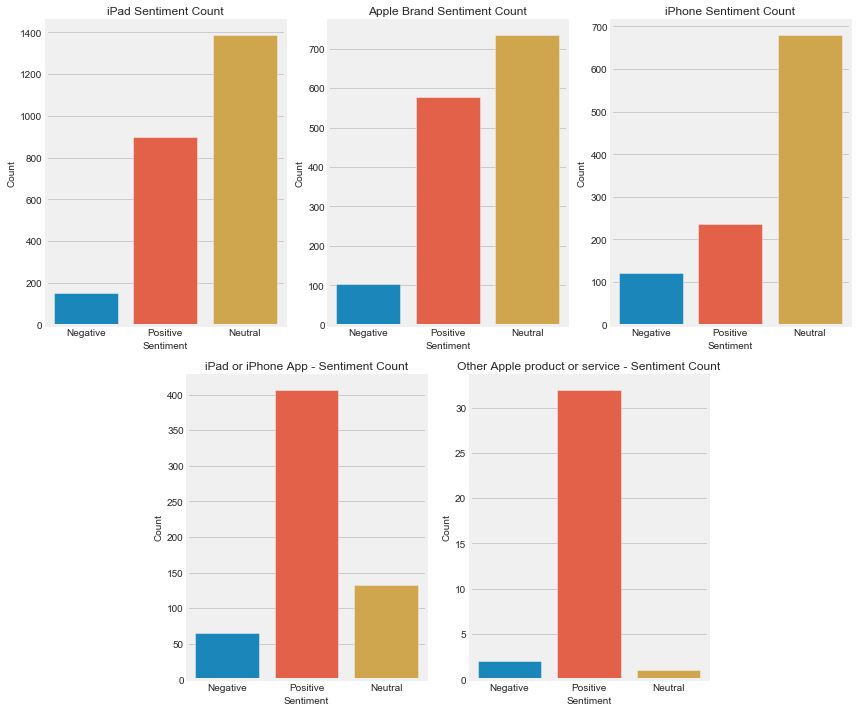

In [36]:
plt.figure(figsize=(12,10))


ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'iPad']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'iPad']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'iPad'], 
            ax=ax1)
ax1.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax1.set_xlabel('Sentiment', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('iPad Sentiment Count',fontsize=12)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'Apple']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'Apple']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'Apple'], 
            ax=ax2)
ax2.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax2.set_xlabel('Sentiment', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_title('Apple Brand Sentiment Count', fontsize=12)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'iPhone']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'iPhone']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'iPhone'], 
            ax=ax3)
ax3.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax3.set_xlabel('Sentiment', fontsize=10)
ax3.set_ylabel('Count', fontsize=10)
ax3.set_title('iPhone Sentiment Count', fontsize=12)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'iPad or iPhone App']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'iPad or iPhone App']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'iPad or iPhone App'], 
            ax=ax4)
ax4.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax4.set_xlabel('Sentiment', fontsize=10)
ax4.set_ylabel('Count', fontsize=10)
ax4.set_title('iPad or iPhone App - Sentiment Count', fontsize=12)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'Other Apple product or service']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'Other Apple product or service']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'Other Apple product or service'], 
            ax=ax5)
ax5.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax5.set_xlabel('Sentiment', fontsize=10)
ax5.set_ylabel('Count', fontsize=10)
ax5.set_title('Other Apple product or service - Sentiment Count', fontsize=12)

plt.tight_layout()

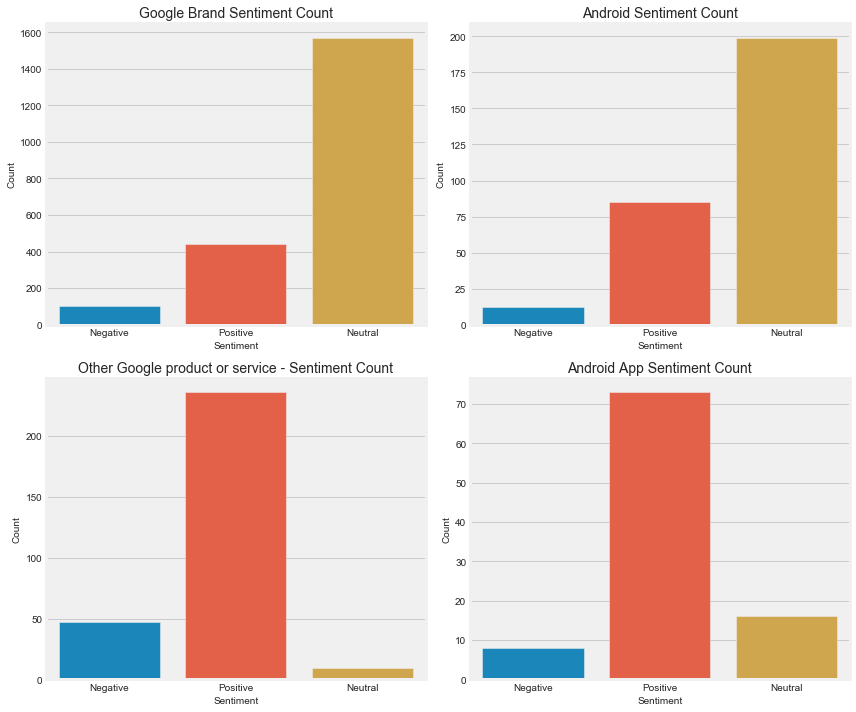

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'Google']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'Google']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'Google'], 
            ax=ax1)
ax1.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax1.set_xlabel('Sentiment', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Google Brand Sentiment Count', fontsize=14)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'Android']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'Android']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'Android'], 
            ax=ax2)
ax2.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax2.set_xlabel('Sentiment', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_title('Android Sentiment Count', fontsize=14)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'Other Google product or service']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'Other Google product or service']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'Other Google product or service'], 
            ax=ax3)
ax3.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax3.set_xlabel('Sentiment', fontsize=10)
ax3.set_ylabel('Count', fontsize=10)
ax3.set_title('Other Google product or service - Sentiment Count', fontsize=14)

sns.barplot(x=df_branded.loc[df_branded.brand_product == 'Android App']['sentiment'].value_counts().index,
            y=df_branded.loc[df_branded.brand_product == 'Android App']['sentiment'].value_counts().values, 
            data=df_branded.loc[df_branded.brand_product == 'Android App'], 
            ax=ax4)
ax4.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax4.set_xlabel('Sentiment', fontsize=10)
ax4.set_ylabel('Count', fontsize=10)
ax4.set_title('Android App Sentiment Count', fontsize=14)

fig.tight_layout()

In [38]:
def count_hashtags(text):
    counter = 0
    for word in text:
        if '#' in word:
            counter += 1
        else:
            continue
    return  counter


def count_mentions(text):
    counter = 0
    for word in text:
        if '@' in word:
            counter += 1
        else:
            continue
    return counter

def count_weblinks(text):
    list_of_counts = []
    for word in text.split():
        http_count = word.count('http:')
        link_count = word.count('{link}')
        list_of_counts.extend([http_count, link_count])
    return sum(list_of_counts)

def count_length_of_tweet(text):
    words_no_punc = "".join([word for word in text if word not in string.punctuation])
    return len(words_no_punc.split())

def count_punctuation(text):
    annotated_list = []
    punctuation_list = list(string.punctuation)
    punctuation_list.remove('#')
    punctuation_list.remove('@')
    modified_punc = punctuation_list
    
    for word in text.split():
        if word.count('http:') > 0:
            continue
        elif word.count('{link}') > 0:
            continue
        else:
            annotated_list.append(word)
    
    list_of_characters = [char for char in "".join(annotated_list) if char in modified_punc]
    
    return len(list_of_characters)
    
    


In [39]:
df_branded['hashtag_count'] = df_branded['tweet'].apply(count_hashtags)
df_branded['mention_count'] = df_branded['tweet'].apply(count_mentions)
df_branded['weblink_count'] = df_branded['tweet'].apply(count_weblinks)
df_branded['tweet_length'] = df_branded['tweet'].apply(count_length_of_tweet)
df_branded['punct_count'] = df_branded['tweet'].apply(count_punctuation)

/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [40]:
df_branded.head(10)

,tweet,brand_product,sentiment,tweet_tokens,hashtag_count,mention_count,weblink_count,tweet_length,punct_count
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,0,"[wesley83, 3g, iphone, 3, hr, tweeting, riseaustin, dead, need, upgrade, plugin, station, sxsw]",2,1,0,23,7
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,1,"[jessedee, know, fludapp, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, giving, free, t, sxsw]",1,2,0,21,6
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,1,"[swonderlin, wait, ipad, 2, also, sale, sxsw]",2,1,0,15,2
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,0,"[sxsw, hope, year, festival, isnt, crashy, year, iphone, app, sxsw]",1,1,0,15,4
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) & Matt Mullenweg (Wordpress)",Google,1,"[sxtxstate, great, stuff, fri, sxsw, marissa, mayer, google, tim, oreilly, tech, booksconferences, matt, mullenweg, wordpress]",1,1,0,16,11
5,@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd,iPad,2,"[teachntech00, new, ipad, apps, speechtherapy, communication, showcased, sxsw, conference, httphtly49n4m, iear, edchat, asd]",5,1,1,18,0
6,"#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",Android,1,"[sxsw, starting, ctia, around, corner, googleio, hop, skip, jump, good, time, android, fan]",4,0,0,28,2
7,Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB,iPad or iPhone App,1,"[beautifully, smart, simple, idea, rt, madebymany, thenextweb, wrote, hollergram, ipad, app, sxsw, httpbitlyieavob]",2,2,1,17,1
8,Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear,Apple,1,"[counting, day, sxsw, plus, strong, canadian, dollar, mean, stock, apple, gear]",1,0,0,16,0
9,Excited to meet the @samsungmobileus at #sxsw so I can show them my Sprint Galaxy S still running Android 2.1. #fail,Android,1,"[excited, meet, samsungmobileus, sxsw, show, sprint, galaxy, still, running, android, 21, fail]",2,1,0,21,2


Text(0.5, 1.0, 'Hashtag Distribution for Neutral Tweets')

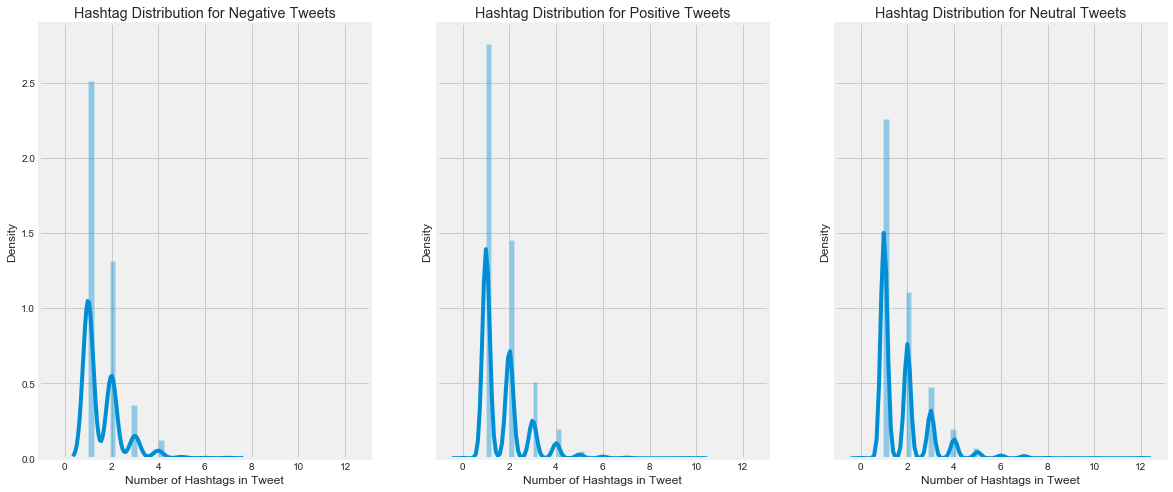

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,8), sharey=True, sharex=True)

sns.distplot(df_branded.loc[df_branded.sentiment == 0]['hashtag_count'],
            ax=ax1)
sns.distplot(df_branded.loc[df_branded.sentiment == 1]['hashtag_count'],
            ax=ax2)
sns.distplot(df_branded.loc[df_branded.sentiment == 2]['hashtag_count'],
            ax=ax3)

ax1.set_xlabel('Number of Hashtags in Tweet')
ax1.set_ylabel('Density')
ax1.set_title('Hashtag Distribution for Negative Tweets')

ax2.set_xlabel('Number of Hashtags in Tweet')
ax2.set_ylabel('Density')
ax2.set_title('Hashtag Distribution for Positive Tweets')

ax3.set_xlabel('Number of Hashtags in Tweet')
ax3.set_ylabel('Density')
ax3.set_title('Hashtag Distribution for Neutral Tweets')



Text(0.5, 1.0, 'Mention Distribution for Neutral Tweets')

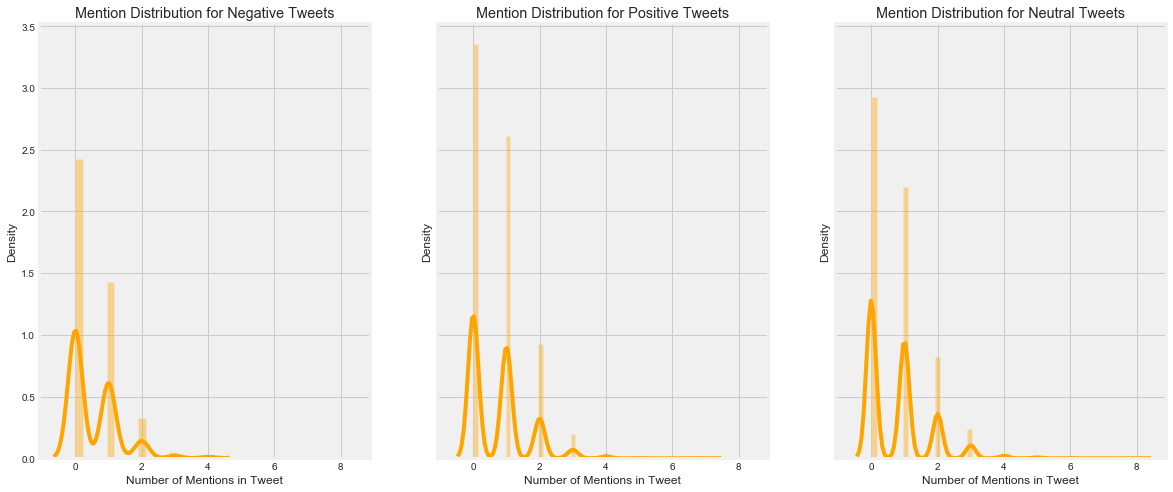

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,8), sharey=True, sharex=True)

sns.distplot(df_branded.loc[df_branded.sentiment == 0]['mention_count'],
            ax=ax1, color='orange')
sns.distplot(df_branded.loc[df_branded.sentiment == 1]['mention_count'],
            ax=ax2, color='orange')
sns.distplot(df_branded.loc[df_branded.sentiment == 2]['mention_count'],
            ax=ax3, color='orange')

ax1.set_xlabel('Number of Mentions in Tweet')
ax1.set_ylabel('Density')
ax1.set_title('Mention Distribution for Negative Tweets')

ax2.set_xlabel('Number of Mentions in Tweet')
ax2.set_ylabel('Density')
ax2.set_title('Mention Distribution for Positive Tweets')

ax3.set_xlabel('Number of Mentions in Tweet')
ax3.set_ylabel('Density')
ax3.set_title('Mention Distribution for Neutral Tweets')

Text(0.5, 1.0, 'Weblink Distribution for Neutral Tweets')

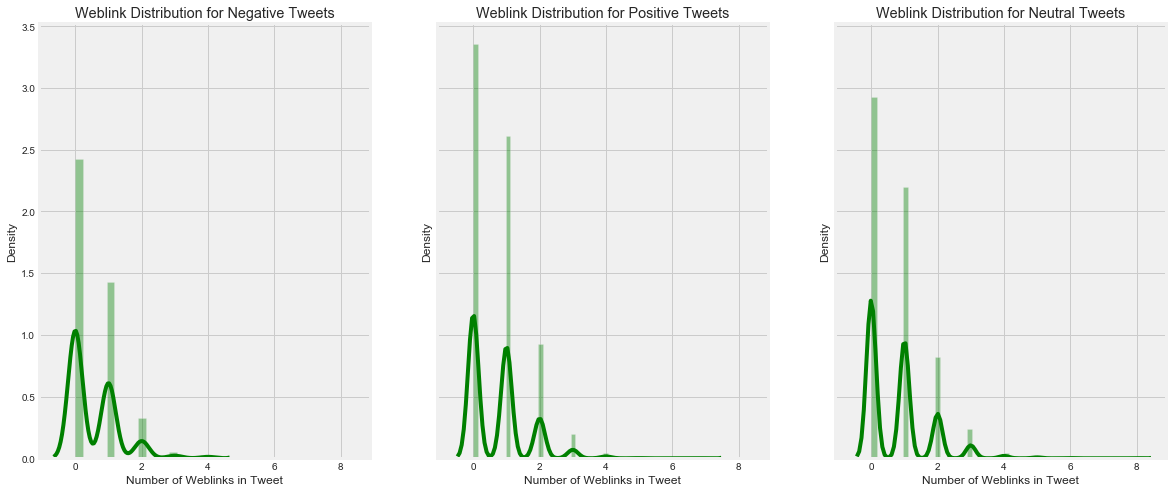

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,8), sharey=True, sharex=True)

sns.distplot(df_branded.loc[df_branded.sentiment == 0]['mention_count'],
            ax=ax1, color='green')
sns.distplot(df_branded.loc[df_branded.sentiment == 1]['mention_count'],
            ax=ax2, color='green')
sns.distplot(df_branded.loc[df_branded.sentiment == 2]['mention_count'],
            ax=ax3, color='green')

ax1.set_xlabel('Number of Weblinks in Tweet')
ax1.set_ylabel('Density')
ax1.set_title('Weblink Distribution for Negative Tweets')

ax2.set_xlabel('Number of Weblinks in Tweet')
ax2.set_ylabel('Density')
ax2.set_title('Weblink Distribution for Positive Tweets')

ax3.set_xlabel('Number of Weblinks in Tweet')
ax3.set_ylabel('Density')
ax3.set_title('Weblink Distribution for Neutral Tweets')

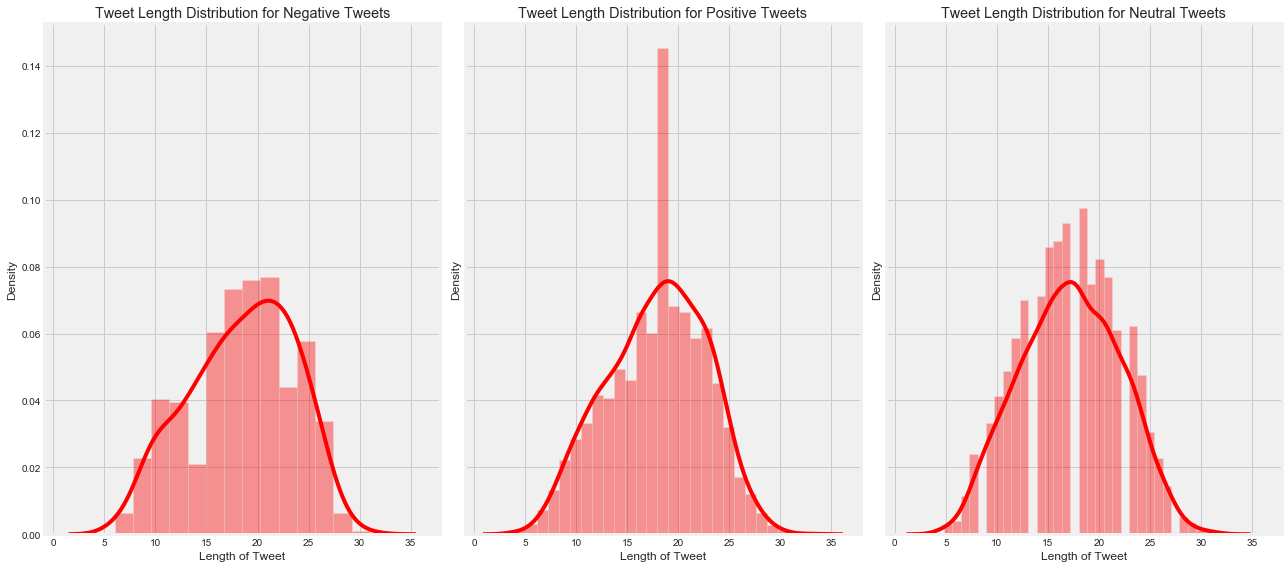

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,8), sharey=True, sharex=True)

sns.distplot(df_branded.loc[df_branded.sentiment == 0]['tweet_length'],
            ax=ax1, color='red')
sns.distplot(df_branded.loc[df_branded.sentiment == 1]['tweet_length'],
            ax=ax2, color='red')
sns.distplot(df_branded.loc[df_branded.sentiment == 2]['tweet_length'],
            ax=ax3, color='red')

ax1.set_xlabel('Length of Tweet')
ax1.set_ylabel('Density')
ax1.set_title('Tweet Length Distribution for Negative Tweets')

ax2.set_xlabel('Length of Tweet')
ax2.set_ylabel('Density')
ax2.set_title('Tweet Length Distribution for Positive Tweets')

ax3.set_xlabel('Length of Tweet')
ax3.set_ylabel('Density')
ax3.set_title('Tweet Length Distribution for Neutral Tweets')

fig.tight_layout()

Text(0.5, 1.0, 'Distribution of Tweet Length by Sentiment')

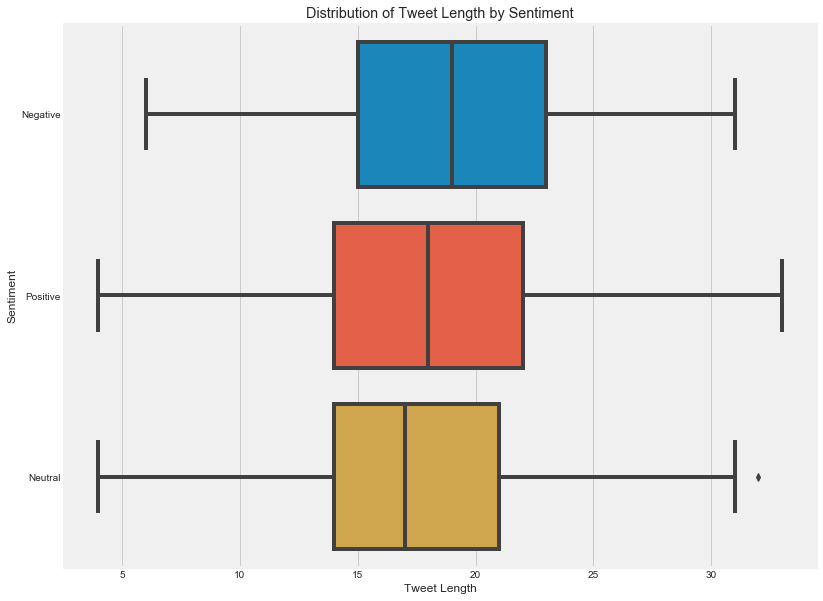

In [45]:
plt.figure(figsize=(12, 10))

ax = sns.boxplot(x='tweet_length', y='sentiment', data=df_branded, orient='h')
ax.set_yticklabels(['Negative', 'Positive', 'Neutral'])
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment')
plt.title('Distribution of Tweet Length by Sentiment')

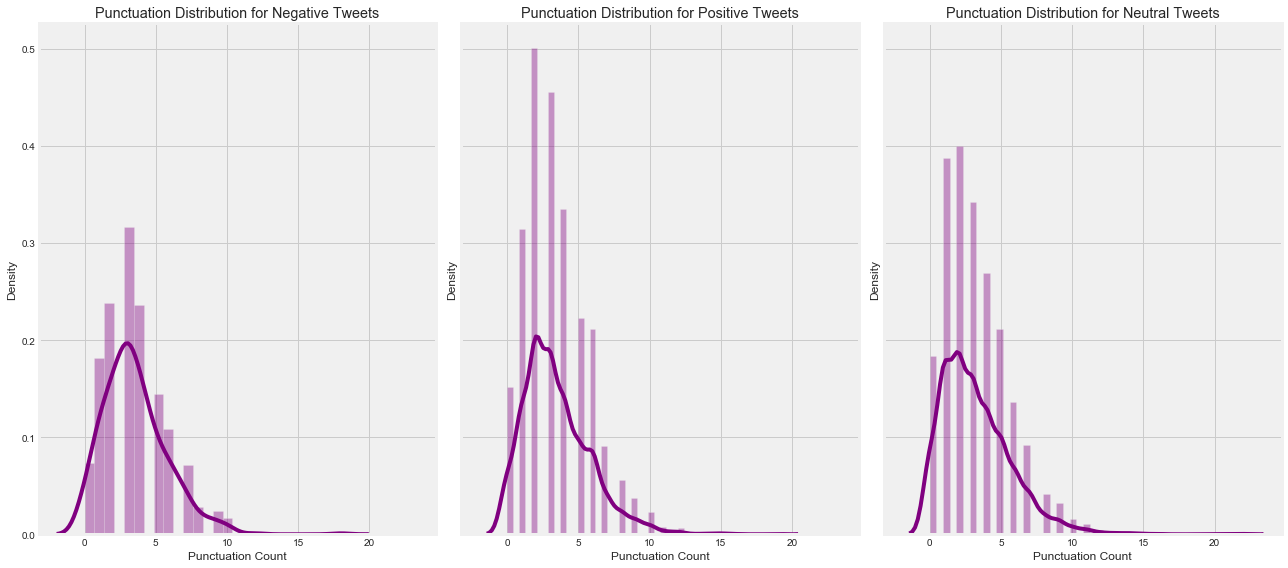

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,8), sharey=True, sharex=True)

sns.distplot(df_branded.loc[df_branded.sentiment == 0]['punct_count'],
            ax=ax1, color='purple')
sns.distplot(df_branded.loc[df_branded.sentiment == 1]['punct_count'],
            ax=ax2, color='purple')
sns.distplot(df_branded.loc[df_branded.sentiment == 2]['punct_count'],
            ax=ax3, color='purple')

ax1.set_xlabel('Punctuation Count')
ax1.set_ylabel('Density')
ax1.set_title('Punctuation Distribution for Negative Tweets')

ax2.set_xlabel('Punctuation Count')
ax2.set_ylabel('Density')
ax2.set_title('Punctuation Distribution for Positive Tweets')

ax3.set_xlabel('Punctuation Count')
ax3.set_ylabel('Density')
ax3.set_title('Punctuation Distribution for Neutral Tweets')

fig.tight_layout()

Text(0.5, 1.0, 'Distribution of Punctuation Count by Sentiment')

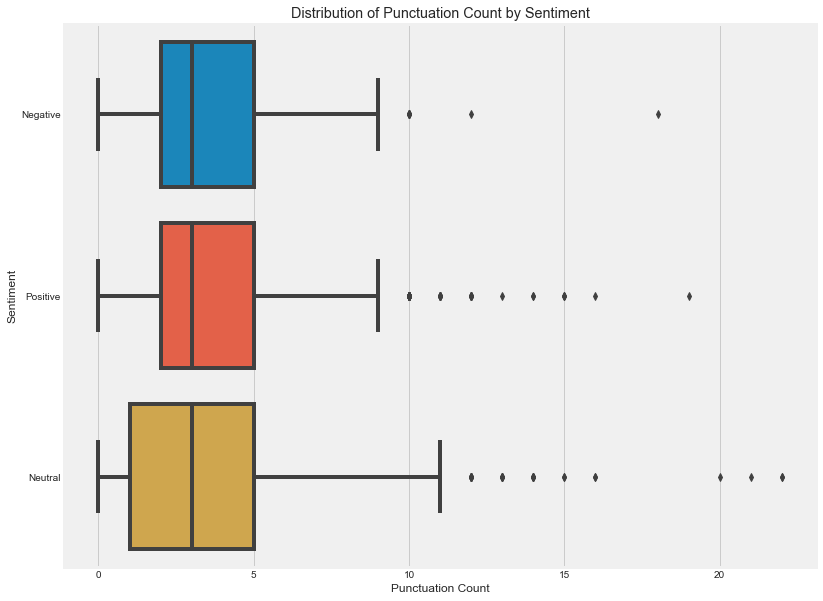

In [47]:
plt.figure(figsize=(12, 10))

ax = sns.boxplot(x='punct_count', y='sentiment', data=df_branded, orient='h')
ax.set_yticklabels(['Negative', 'Positive', 'Neutral'])
plt.xlabel('Punctuation Count')
plt.ylabel('Sentiment')
plt.title('Distribution of Punctuation Count by Sentiment')

In [48]:
pd.set_option('max_columns', None)
df_branded.groupby('sentiment').describe()

hashtag_count                                                \
                  count      mean       std  min  25%  50%  75%   max   
sentiment                                                               
0                 611.0  1.587561  0.845495  1.0  1.0  1.0  2.0   7.0   
1                2989.0  1.686183  0.969004  0.0  1.0  1.0  2.0  10.0   
2                4730.0  1.780338  1.144902  0.0  1.0  1.0  2.0  12.0   

          mention_count                                               \
                  count      mean       std  min  25%  50%  75%  max   
sentiment                                                              
0                 611.0  0.549918  0.741319  0.0  0.0  0.0  1.0  4.0   
1                2989.0  0.740381  0.853871  0.0  0.0  1.0  1.0  7.0   
2                4730.0  0.778224  0.920888  0.0  0.0  1.0  1.0  8.0   

          weblink_count                                               \
                  count      mean       std  min  25%  50%  75%  max   
sentiment                                                              
0                 611.0  0.186579  0.402309  0.0  0.0  0.0  0.0  2.0   
1                2989.0  0.407494  0.503559  0.0  0.0  0.0  1.0  2.0   
2                4730.0  0.492178  0.533546  0.0  0.0  0.0  1.0  3.0   

          tweet_length                                                    \
                 count       mean       std  min   25%   50%   75%   max   
sentiment                                                                  
0                611.0  18.502455  5.113266  6.0  15.0  19.0  23.0  31.0   
1               2989.0  17.892606  4.879626  4.0  14.0  18.0  22.0  33.0   
2               4730.0  17.190486  4.882363  4.0  14.0  17.0  21.0  32.0   

          punct_count                                                
                count      mean       std  min  25%  50%  75%   max  
sentiment                                                            
0               611.0  3.531915  2.240509  0.0  2.0  3.0  5.0  18.0  
1              2989.0  3.435597  2.326356  0.0  2.0  3.0  5.0  19.0  
2              4730.0  3.229598  2.446149  0.0  1.0  3.0  5.0  22.0

In [49]:
df_binary = df_branded.copy()
df_binary['sentiment'].replace({2:0}, inplace=True)

In [50]:
df_binary.groupby('sentiment').describe()

hashtag_count                                                \
                  count      mean       std  min  25%  50%  75%   max   
sentiment                                                               
0                5341.0  1.758285  1.116353  0.0  1.0  1.0  2.0  12.0   
1                2989.0  1.686183  0.969004  0.0  1.0  1.0  2.0  10.0   

          mention_count                                               \
                  count      mean       std  min  25%  50%  75%  max   
sentiment                                                              
0                5341.0  0.752106  0.905020  0.0  0.0  1.0  1.0  8.0   
1                2989.0  0.740381  0.853871  0.0  0.0  1.0  1.0  7.0   

          weblink_count                                               \
                  count      mean       std  min  25%  50%  75%  max   
sentiment                                                              
0                5341.0  0.457218  0.529199  0.0  0.0  0.0  1.0  3.0   
1                2989.0  0.407494  0.503559  0.0  0.0  0.0  1.0  2.0   

          tweet_length                                                    \
                 count       mean       std  min   25%   50%   75%   max   
sentiment                                                                  
0               5341.0  17.340573  4.926567  4.0  14.0  17.0  21.0  32.0   
1               2989.0  17.892606  4.879626  4.0  14.0  18.0  22.0  33.0   

          punct_count                                                
                count      mean       std  min  25%  50%  75%   max  
sentiment                                                            
0              5341.0  3.264183  2.425220  0.0  1.0  3.0  5.0  22.0  
1              2989.0  3.435597  2.326356  0.0  2.0  3.0  5.0  19.0

## Modeling

In [51]:
tfidf_vec = TfidfVectorizer()
X_tfidf = tfidf_vec.fit_transform((df_branded['tweet_tokens'].apply(lambda x: " ".join(x))))

In [52]:
print(X_tfidf.shape)

(8330, 8899)


In [53]:
len(df_branded)

8330

In [54]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vec.get_feature_names()
df_vanilla = pd.concat([df_branded['sentiment'], X_tfidf_df], axis=1)

In [55]:
pd.reset_option('max_columns', 10)
df_vanilla.head()

,sentiment,02,03,0310,0310apple,031111,10,100,1000,10000,...,zip,zite,zms,zombie,zomg,zone,zoom,zuckerberg,zynga,zzzs
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
X = df_vanilla.drop(columns=['sentiment'])
y = df_vanilla['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)

In [57]:
#create training and test sets with added features
X_af = pd.concat([df_branded['hashtag_count'], df_branded['mention_count'], df_branded['weblink_count'],
              df_branded['tweet_length'], X], axis=1)
X_af_train, X_af_test, y_train, y_test = train_test_split(X_af, y, test_size=0.3, stratify=y,
                                                         random_state=123)

### Multinomial Bayes Classifier

In [57]:
###Multinomial Bayes
mnb_clf_vanilla = MultinomialNB()
mnb_clf_vanilla.fit(X_train, y_train)
mnb_clf_vanilla_cv_mean = np.mean(cross_val_score(mnb_clf_vanilla, X_train, y_train,
                                                 cv=5, scoring='accuracy', n_jobs=-1))

In [58]:
print(f"Training Accuracy: {mnb_clf_vanilla.score(X_train, y_train)}")
print(f"Mean Cross Validation Training Accuracy: {mnb_clf_vanilla_cv_mean}")
print(f"Testing Accuracy: {mnb_clf_vanilla.score(X_test, y_test)}")

Training Accuracy: 0.750986108729206
Mean Cross Validation Training Accuracy: 0.6251075531960238
Testing Accuracy: 0.6238495398159264


In [59]:
mnb_vanilla_param = {'alpha':[0, 0.01, 1, 2, 10],
                     'fit_prior':[True, False]}

gs_mnb_vanilla = GridSearchCV(mnb_clf_vanilla, param_grid=mnb_vanilla_param, cv=5, n_jobs=-1)
gs_mnb_vanilla.fit(X_train, y_train)
gs_mnb_vanilla_cv_mean = np.mean(cross_val_score(gs_mnb_vanilla, X_train, y_train,
                                                 cv=5, scoring='accuracy', n_jobs=-1))
gs_mnb_vanilla.best_params_

{'alpha': 2, 'fit_prior': False}

In [60]:
print(f"GridSearchCV Training Score: {gs_mnb_vanilla.score(X_train, y_train)}")
print(f"Mean Cross Validation Training Accuracy: {gs_mnb_vanilla_cv_mean}")
print(f"GridSearchCV Testing Score: {gs_mnb_vanilla.score(X_test, y_test)}")

GridSearchCV Training Score: 0.7761961927628194
Mean Cross Validation Training Accuracy: 0.6228746209732774
GridSearchCV Testing Score: 0.6410564225690276


In [83]:
#using added features
mnb_af = MultinomialNB(alpha=2, fit_prior=False)
mnb_af.fit(X_af_train, y_train)
mnb_af_cv_mean = np.mean(cross_val_score(mnb_af, X_af_train, y_train, cv=5, scoring='accuracy'))

In [84]:
print(f"Added Features Training Score: {mnb_af.score(X_af_train, y_train)}")
print(f"Added Features Cross Validation Mean: {mnb_af_cv_mean}")
print(f"Added Features Testing Score: {mnb_af.score(X_af_test, y_test)}")

Added Features Training Score: 0.7761961927628194
Added Features Cross Validation Mean: 0.633166216170533
Added Features Testing Score: 0.6410564225690276


In [116]:
print(classification_report(y_test, mnb_af.predict(X_af_test)))

              precision    recall  f1-score   support

           0       0.34      0.06      0.10       183
           1       0.60      0.46      0.52       897
           2       0.66      0.83      0.74      1419

    accuracy                           0.64      2499
   macro avg       0.53      0.45      0.45      2499
weighted avg       0.62      0.64      0.61      2499



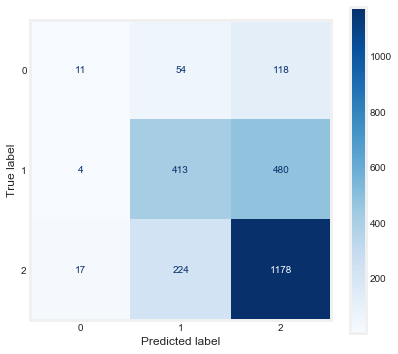

In [110]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.grid(False)
plot_confusion_matrix(mnb_af, X_af_test, y_test, cmap='Blues', ax=ax)

### Random Forest Classifier

In [61]:
rf_clf_vanilla = RandomForestClassifier()
rf_clf_vanilla.fit(X_train, y_train)
rf_clf_vanilla_cv_mean = np.mean(cross_val_score(rf_clf_vanilla, X_train, y_train,
                                                cv=5, scoring='accuracy', n_jobs=-1))

In [62]:
print(f"Training Accuracy: {rf_clf_vanilla.score(X_train, y_train)}")
print(f"Mean Cross Validation Training Accuracy: {rf_clf_vanilla_cv_mean}")
print(f"Testing Accuracy: {rf_clf_vanilla.score(X_test, y_test)}")

Training Accuracy: 0.9943405933802092
Mean Cross Validation Training Accuracy: 0.6360827560662647
Testing Accuracy: 0.6654661864745899


In [63]:
rf_vanilla_param = {'n_estimators':[30, 100, 150, 200],
                     'criterion':['gini', 'entropy'], 
                    'max_depth':[3, 4, 5], 
                    'min_samples_split':[3, 4, 5],
                    'class_weight':['balanced', 'balanced_subsample']}

gs_rf_vanilla = GridSearchCV(rf_clf_vanilla, param_grid=rf_vanilla_param, cv=5, n_jobs=-1)
gs_rf_vanilla.fit(X_train, y_train)
gs_rf_vanilla_cv_mean = np.mean(cross_val_score(gs_rf_vanilla, X_train, y_train, 
                                                cv=5, scoring='accuracy', n_jobs=-1))
gs_rf_vanilla.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 4,
 'n_estimators': 200}

In [64]:
print(f"GridSearchCV Training Accuracy: {gs_rf_vanilla.score(X_train, y_train)}")
print(f"Mean Cross Validation Training Accuracy: {gs_rf_vanilla_cv_mean}")
print(f"GridSearchCV Testing Accuracy: {gs_rf_vanilla.score(X_test, y_test)}")

GridSearchCV Training Accuracy: 0.5194649288286743
Mean Cross Validation Training Accuracy: 0.4522309479820271
GridSearchCV Testing Accuracy: 0.4781912765106042


In [97]:
rfc_af = RandomForestClassifier(n_estimators = 200, criterion='entropy', max_depth=5, min_samples_split=4,
                               class_weight='balanced_subsample')
rfc_af.fit(X_af_train, y_train)
rfc_af_cv_mean = np.mean(cross_val_score(rfc_af, X_af_train, y_train, cv=5, scoring='accuracy'))

In [98]:
print(f"Added Features Training Accuracy: {rfc_af.score(X_af_train, y_train)}")
print(f"Added Features Cross Validation Mean: {rfc_af_cv_mean}")
print(f"Added Features Testing Accuracy: {rfc_af.score(X_af_test, y_test)}")

Added Features Training Accuracy: 0.5235808609157949
Added Features Cross Validation Mean: 0.47075552537549925
Added Features Testing Accuracy: 0.48139255702280914


In [118]:
print(classification_report(y_test, rfc_af.predict(X_af_test)))

              precision    recall  f1-score   support

           0       0.15      0.72      0.25       183
           1       0.56      0.40      0.47       897
           2       0.71      0.50      0.59      1419

    accuracy                           0.48      2499
   macro avg       0.47      0.54      0.44      2499
weighted avg       0.61      0.48      0.52      2499



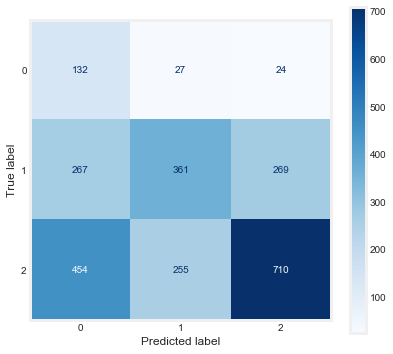

In [111]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.grid(False)
plot_confusion_matrix(rfc_af, X_af_test, y_test, cmap='Blues', ax=ax)

### Support Vector Machine

#### RBF Kernel

In [65]:
svc_vanilla_rbf = SVC()
svc_vanilla_rbf.fit(X_train, y_train)
svc_vanilla_rbf_cv_mean = np.mean(cross_val_score(svc_vanilla_rbf, X_train, y_train, 
                                                  cv=5, scoring='accuracy', n_jobs=-1))

In [66]:
print(f"Training Accuracy: {svc_vanilla_rbf.score(X_train, y_train)}")
print(f"Mean Cross Validation Training Accuracy: {svc_vanilla_rbf_cv_mean}")
print(f"Testing Accuracy: {svc_vanilla_rbf.score(X_test, y_test)}")

Training Accuracy: 0.907563025210084
Mean Cross Validation Training Accuracy: 0.6546035119590924
Testing Accuracy: 0.6666666666666666


In [67]:
rbf_vanilla_param = {'C':[0.1, 1, 10],
                     'kernel':['rbf'], 
                    'class_weight':['balanced'], 
                    }

gs_rbf_vanilla = GridSearchCV(svc_vanilla_rbf, param_grid=rbf_vanilla_param, cv=5, n_jobs=-1)
gs_rbf_vanilla.fit(X_train, y_train)
gs_rbf_vanilla_cv_mean = np.mean(cross_val_score(gs_rbf_vanilla, X_train, y_train, 
                                                  cv=5, scoring='accuracy', n_jobs=-1))
gs_rbf_vanilla.best_params_

{'C': 10, 'class_weight': 'balanced', 'kernel': 'rbf'}

In [68]:
print(f"GridSearch Training Accuracy: {gs_rbf_vanilla.score(X_train, y_train)}")
print(f"Mean Cross Validation Training Accuracy: {gs_rbf_vanilla_cv_mean}")
print(f"GridSearch Testing Accuracy: {gs_rbf_vanilla.score(X_test, y_test)}")

GridSearch Training Accuracy: 0.9574687017664208
Mean Cross Validation Training Accuracy: 0.648428848802327
GridSearch Testing Accuracy: 0.662264905962385


In [100]:
rbf_af = SVC(kernel='rbf', C=10, class_weight='balanced')
rbf_af.fit(X_af_train, y_train)
rbf_af_cv_mean = np.mean(cross_val_score(rbf_af, X_af_train, y_train, cv=5, scoring='accuracy', n_jobs=-1))

In [101]:
print(f"Added Features Training Accuracy: {rbf_af.score(X_af_train, y_train)}")
print(f"Added Features Cross Validation Mean: {rbf_af_cv_mean}")
print(f"Added Features Testing Accuracy Mean: {rbf_af.score(X_af_test, y_test)}")

Added Features Training Accuracy: 0.9574687017664208
Added Features Cross Validation Mean: 0.6547753325073014
Added Features Testing Accuracy Mean: 0.662264905962385


In [119]:
print(classification_report(y_test, rbf_af.predict(X_af_test)))

              precision    recall  f1-score   support

           0       0.67      0.25      0.36       183
           1       0.60      0.56      0.58       897
           2       0.69      0.78      0.74      1419

    accuracy                           0.66      2499
   macro avg       0.66      0.53      0.56      2499
weighted avg       0.66      0.66      0.65      2499



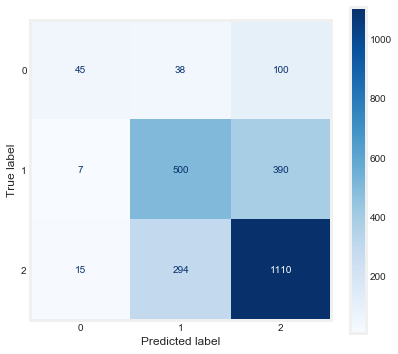

In [112]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.grid(False)
plot_confusion_matrix(rbf_af, X_af_test, y_test, cmap='Blues', ax=ax)

#### Linear Kernel

In [69]:
svc_vanilla_linear = SVC(kernel='linear')
svc_vanilla_linear.fit(X_train, y_train)
svc_vanilla_linear_cv_mean = np.mean(cross_val_score(svc_vanilla_linear, X_train, y_train, 
                                                  cv=5, scoring='accuracy', n_jobs=-1))

In [70]:
print(f"Training Accuracy: {svc_vanilla_linear.score(X_train, y_train)}")
print(f"Mean Cross Validation Training Accuracy: {svc_vanilla_linear_cv_mean}")
print(f"Testing Accuracy: {svc_vanilla_linear.score(X_test, y_test)}")

Training Accuracy: 0.8384496655805179
Mean Cross Validation Training Accuracy: 0.657518876008472
Testing Accuracy: 0.6614645858343338


In [71]:
linear_vanilla_param = {'C':[0.1, 1, 10],
                     'kernel':['linear'], 
                    'class_weight':['balanced'], 
                    }

gs_linear_svc_vanilla = GridSearchCV(svc_vanilla_linear, param_grid=linear_vanilla_param, cv=5, n_jobs=-1)
gs_linear_svc_vanilla.fit(X_train, y_train)
gs_linear_svc_cv_mean = np.mean(cross_val_score(gs_linear_svc_vanilla, X_train, y_train, 
                                                  cv=5, scoring='accuracy', n_jobs=-1))
gs_linear_svc_vanilla.best_params_

{'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}

In [72]:
print(f"GridSearch Training Accuracy: {gs_linear_svc_vanilla.score(X_train, y_train)}")
print(f"Mean Cross Validation Training Accuracy: {gs_linear_svc_cv_mean}")
print(f"GridSearch Testing Accuracy: {gs_linear_svc_vanilla.score(X_test, y_test)} ")

GridSearch Training Accuracy: 0.8465100325844623
Mean Cross Validation Training Accuracy: 0.6343646975649693
GridSearch Testing Accuracy: 0.6530612244897959 


In [103]:
svc_linear_af = SVC(kernel='linear', C=1, class_weight='balanced')
svc_linear_af.fit(X_af_train, y_train)
svc_linear_af_cv_mean = np.mean(cross_val_score(svc_linear_af, X_af_train, y_train, cv=5, scoring='accuracy',
                                               n_jobs=-1))

In [105]:
print(f"Added Features Training Accuracy: {svc_linear_af.score(X_af_train, y_train)}")
print(f"Added Features Cross Validation Mean: {svc_linear_af_cv_mean}")
print(f"Added Features Testing Accuracy: {svc_linear_af.score(X_af_test, y_test)}")

Added Features Training Accuracy: 0.8465100325844623
Added Features Cross Validation Mean: 0.6343646975649693
Added Features Testing Accuracy: 0.6530612244897959


In [120]:
print(classification_report(y_test, svc_linear_af.predict(X_af_test)))

              precision    recall  f1-score   support

           0       0.42      0.42      0.42       183
           1       0.60      0.61      0.60       897
           2       0.72      0.71      0.72      1419

    accuracy                           0.65      2499
   macro avg       0.58      0.58      0.58      2499
weighted avg       0.65      0.65      0.65      2499



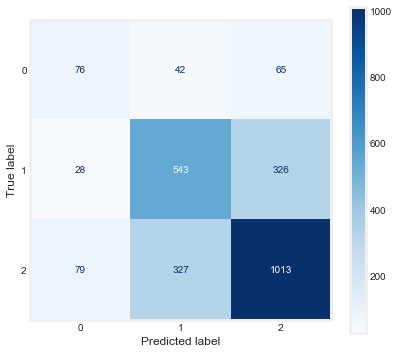

In [113]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.grid(False)
plot_confusion_matrix(svc_linear_af, X_af_test, y_test, cmap='Blues', ax=ax)

### Oversampling and Undersampling

In [58]:
##undersampling and oversampling techniques
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [59]:
y_train.value_counts()

2    3311
1    2092
0     428
Name: sentiment, dtype: int64

In [60]:
oversample = RandomOverSampler(sampling_strategy={0:2000, 1:2500}, random_state=123)
X_af_over_train, y_train_over = oversample.fit_resample(X_af_train, y_train)

In [61]:
y_train_over.value_counts()

2    3311
1    2500
0    2000
Name: sentiment, dtype: int64

In [142]:
mnb_over = MultinomialNB(alpha=2, fit_prior=False)
mnb_over.fit(X_af_over_train, y_train_over)
mnb_over_cv_mean = np.mean(cross_val_score(mnb_over, X_af_over_train, y_train_over, cv=5, scoring='accuracy'))

In [143]:
print(classification_report(y_test, mnb_over.predict(X_af_test)))

              precision    recall  f1-score   support

           0       0.32      0.49      0.39       183
           1       0.62      0.51      0.56       897
           2       0.70      0.73      0.72      1419

    accuracy                           0.63      2499
   macro avg       0.55      0.58      0.55      2499
weighted avg       0.64      0.63      0.64      2499



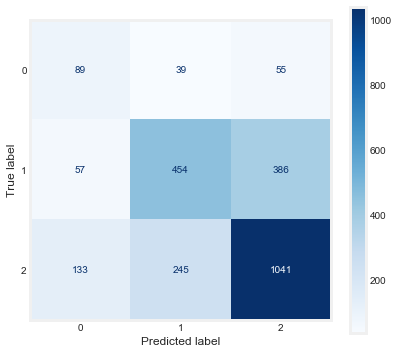

In [144]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.grid(False)
plot_confusion_matrix(mnb_over, X_af_test, y_test, cmap='Blues', ax=ax)

In [146]:
rfc_over = RandomForestClassifier(n_estimators = 200, criterion='entropy', max_depth=5, min_samples_split=4,
                               class_weight='balanced_subsample')
rfc_over.fit(X_af_over_train, y_train_over)
rfc_over_cv_mean = np.mean(cross_val_score(rfc_over, X_af_over_train, y_train_over, cv=5, scoring='accuracy'))

In [147]:
print(classification_report(y_test, rfc_over.predict(X_af_test)))

              precision    recall  f1-score   support

           0       0.16      0.73      0.26       183
           1       0.53      0.43      0.47       897
           2       0.72      0.46      0.56      1419

    accuracy                           0.47      2499
   macro avg       0.47      0.54      0.43      2499
weighted avg       0.61      0.47      0.51      2499



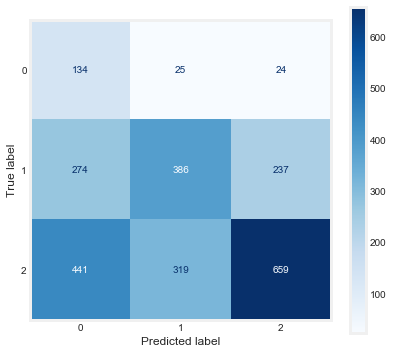

In [148]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.grid(False)
plot_confusion_matrix(rfc_over, X_af_test, y_test, cmap='Blues', ax=ax)

In [150]:
svc_linear_over = SVC(kernel='linear', C=1, class_weight='balanced')
svc_linear_over.fit(X_af_over_train, y_train_over)
svc_linear_over_cv_mean = np.mean(cross_val_score(svc_linear_over, X_af_over_train, y_train_over, 
                                                cv=5, scoring='accuracy', n_jobs=-1))

In [151]:
print(classification_report(y_test, svc_linear_over.predict(X_af_test)))

              precision    recall  f1-score   support

           0       0.45      0.40      0.42       183
           1       0.60      0.61      0.60       897
           2       0.72      0.73      0.72      1419

    accuracy                           0.66      2499
   macro avg       0.59      0.58      0.58      2499
weighted avg       0.66      0.66      0.66      2499



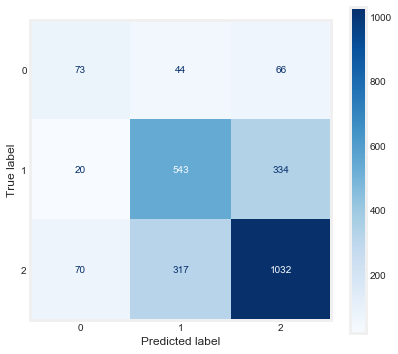

In [152]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.grid(False)
plot_confusion_matrix(svc_linear_over, X_af_test, y_test, cmap='Blues', ax=ax)

### Binary Classification 

In [62]:
###create test and training sets with binary categories
###remove some of the added features: punctuation, weblink count
tfidf_vec_bin = TfidfVectorizer()
X_tfidf_bin = tfidf_vec_bin.fit_transform((df_binary['tweet_tokens'].apply(lambda x: " ".join(x))))
X_tfidf_df_bin = pd.DataFrame(X_tfidf_bin.toarray())
X_tfidf_df_bin.columns = tfidf_vec_bin.get_feature_names()

In [63]:
from sklearn.preprocessing import StandardScaler

In [68]:
#Log transform tweet length and then standard scale remaining added features
added_feats = pd.concat([df_binary['hashtag_count'], df_binary['mention_count'], 
                         df_binary['tweet_length']], axis=1)
added_feats['tweet_length'] = added_feats['tweet_length'].map(lambda x: np.log(x))

X_binary = pd.concat([added_feats, X_tfidf_df_bin], axis=1)


In [67]:
y_binary = df_binary['sentiment']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.3, 
                                                                    stratify=y_binary)

0        2
1        1
2        2
3        1
4        1
5        5
6        4
7        2
8        1
9        2
10       1
11       1
12       1
13       1
14       2
15       1
16       2
17       1
18       1
19       1
20       1
21       2
22       1
23       1
24       4
25       2
26       2
27       3
28       2
29       2
30       2
31       2
32       1
33       1
34       1
35       5
36       2
37       4
38       1
39       1
40       1
41       2
42       3
43       3
44       4
45       1
46       1
47       2
48       1
49       1
50       2
51       2
52       2
53       2
54       1
55       2
56       4
57       2
58       3
59       2
60       1
61       1
62       1
63       2
64       3
65       1
66       1
67       1
68       2
69       2
70       1
71       1
72       1
73       1
74       2
75       4
76       1
77       2
78       1
79       3
80       1
81       4
82       1
83       3
84       2
85       1
86       2
87       2
88       2
89       2
90       3

In [ ]:
mnb_binary = MultinomialNB(alpha=2, fit_prior=False)